## Data Mining and Machine Learning
### Edgar Acuna
### Novelty detection using Mahalanobis Distance, MCD, LOF, Isolation Forest and Clustering(kmeans, DBSCAN)
#### Dataset Diabetes
#### March 2022

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.preprocessing import StandardScaler

In [2]:
url= "https://academic.uprm.edu/eacuna/diabetes.dat"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_table(url, names=names)
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,2
1,1,85,66,29,0,26.6,0.351,31,1
2,8,183,64,0,0,23.3,0.672,32,2
3,1,89,66,23,94,28.1,0.167,21,1
4,0,137,40,35,168,43.1,2.288,33,2


### Extracting all the datapoints form class 1

In [3]:
yd=data['class']
X1=data[data['class']==1]
Xc1=X1.iloc[:,0:8]
print(Xc1)

     preg  plas  pres  skin  test  mass   pedi  age
1       1    85    66    29     0  26.6  0.351   31
3       1    89    66    23    94  28.1  0.167   21
5       5   116    74     0     0  25.6  0.201   30
7      10   115     0     0     0  35.3  0.134   29
10      4   110    92     0     0  37.6  0.191   30
..    ...   ...   ...   ...   ...   ...    ...  ...
762     9    89    62     0     0  22.5  0.142   33
763    10   101    76    48   180  32.9  0.171   63
764     2   122    70    27     0  36.8  0.340   27
765     5   121    72    23   112  26.2  0.245   30
767     1    93    70    31     0  30.4  0.315   23

[500 rows x 8 columns]


### 0. Exploring outliers using Boxplots

<AxesSubplot:>

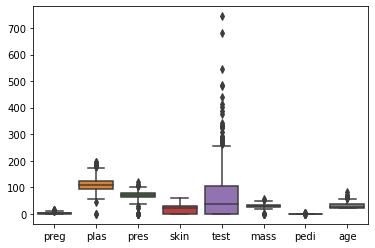

In [4]:
import seaborn as sns
sns.boxplot(data=Xc1)

#### Feature test shows a large amount of outliers

### 1. Outlier Detection using Mahalanobis Distance

In [5]:
#create function to calculate Mahalanobis distance
def mahalanobis(x=None, data=None, cov=None):

    x_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(x_mu, inv_covmat)
    mahal = np.dot(left, x_mu.T)
    return mahal.diagonal()

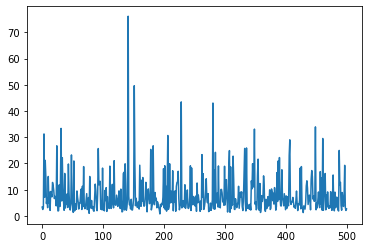

In [6]:
mh=mahalanobis(Xc1,data=Xc1)
plt.plot(mh)

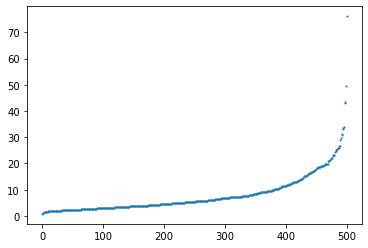

In [7]:
mh=mahalanobis(Xc1,data=Xc1)
plt.plot(np.sort(mh),marker='.',linestyle='None',markersize = 2.0)

<AxesSubplot:>

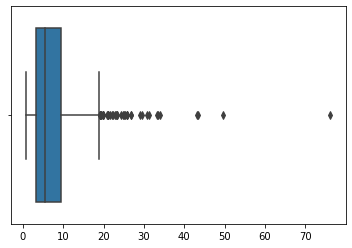

In [8]:
sns.boxplot(x=mh)

In [9]:
mh1=pd.Series(mh,index=Xc1.index)
outs= mh1[mh1 >20.0]
#print(outs.index)
print(outs)

7      31.273760
12     21.209561
49     26.750454
58     33.385928
60     22.212416
81     23.259208
86     20.970823
145    25.705911
182    21.065892
228    76.176431
247    49.672987
286    25.377663
294    26.750191
336    30.682114
371    43.494126
426    23.389467
453    43.070890
459    24.258342
487    24.920184
494    22.806980
519    25.751790
522    25.925746
537    33.121450
549    21.667486
593    20.984161
596    22.264786
621    23.051348
622    29.023577
684    33.959666
703    29.548576
744    24.982187
dtype: float64


### 2. Minimum  Covariance Distance ( MCD)

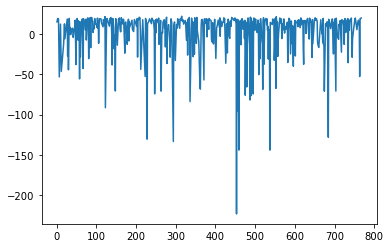

In [10]:
from sklearn.covariance import EllipticEnvelope
clf=EllipticEnvelope(contamination=0.25)
clf.fit(Xc1)
outmcd = clf.decision_function(Xc1)
outmcd=pd.Series(outmcd,index=Xc1.index)
plt.plot(outmcd)

<AxesSubplot:>

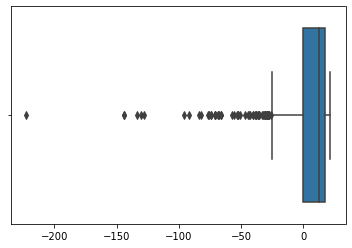

In [11]:
sns.boxplot(x=outmcd)

In [12]:
outs1= outmcd[outmcd < -40.0]
print(outs1)

7      -53.392126
12     -46.568091
30     -44.572234
58     -55.810247
67     -43.006858
123    -91.499555
148    -70.781273
212    -43.927229
222    -40.428223
223    -52.804512
228   -130.357450
247    -74.285760
263    -70.929257
294   -133.298304
336    -83.909630
361    -65.883709
362    -68.470700
371    -57.119955
453   -222.805214
456    -95.875704
459   -143.826508
475    -76.022357
479    -65.722634
487    -81.913062
489    -76.692458
495    -74.498485
509    -50.586686
519    -68.824434
537   -143.884049
552    -67.598799
596    -40.095379
674    -71.022762
684   -127.948121
703    -70.860957
763    -52.833853
dtype: float64


### 3. Local Outlier Factor (LOF)

In [13]:
# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(Xc1)
#print(np.where(y_pred==-1))

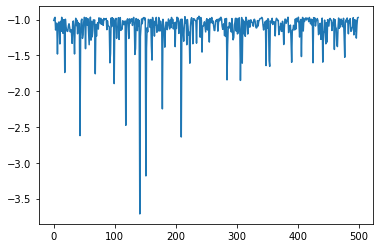

In [14]:
X_scores = clf.negative_outlier_factor_
plt.plot(X_scores)

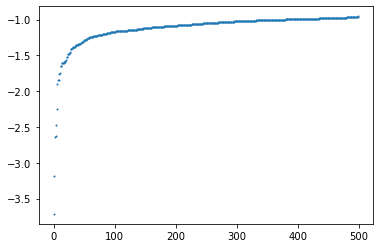

In [15]:
plt.plot(np.sort(X_scores),marker='.',linestyle='None',markersize = 2.0)

<AxesSubplot:>

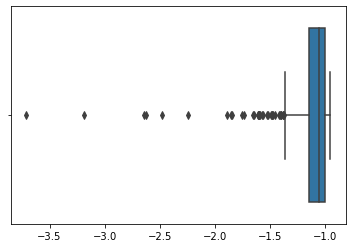

In [16]:
sns.boxplot(x=X_scores)

In [17]:
lofs1=pd.Series(X_scores,index=Xc1.index)
outs2= lofs1[lofs1 < -1.4]
print(outs2)

18    -1.480470
40    -1.738998
62    -1.479756
75    -2.620721
86    -1.405982
106   -1.756651
145   -1.603657
146   -1.472256
153   -1.893882
182   -2.477287
211   -1.486654
212   -1.402344
228   -3.714689
247   -3.183683
260   -1.565333
286   -2.246802
342   -2.639874
362   -1.608571
392   -1.453543
459   -1.842283
486   -1.849507
489   -1.607684
537   -1.642067
548   -1.572597
549   -1.653318
597   -1.596125
622   -1.516020
645   -1.603176
672   -1.593961
703   -1.416859
728   -1.526423
dtype: float64


### 4. Isolation Forest

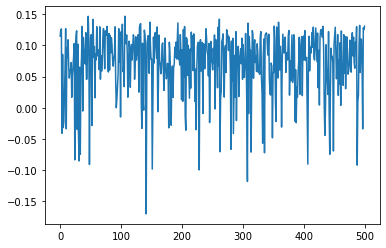

In [18]:
model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1),max_features=1.0)
model.fit(Xc1)
scores=model.decision_function(Xc1)
plt.plot(scores)

<AxesSubplot:>

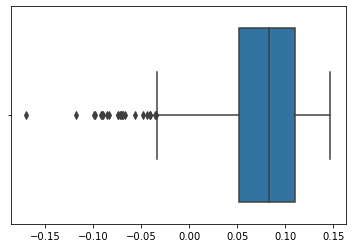

In [19]:
sns.boxplot(x=scores)

In [20]:
scores=pd.Series(scores,index=Xc1.index)
outs3= scores[scores < -0.05]
print(outs3)

49    -0.083432
58    -0.085257
60    -0.074452
81    -0.090891
228   -0.170106
247   -0.098278
371   -0.099601
426   -0.070485
453   -0.066546
487   -0.118056
494   -0.070990
519   -0.056673
522   -0.072073
622   -0.090246
673   -0.074576
684   -0.069264
744   -0.091888
dtype: float64


### 5. Outlier detection using Kmeans

In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.neighbors import DistanceMetric

In [22]:
scaler = StandardScaler()
scaler.fit(Xc1)
Xd= scaler.transform(Xc1)

In [23]:
kmeans = KMeans(n_clusters=30, random_state=0).fit(Xd)
clustlabels=kmeans.labels_
#print(clustlabels)

In [24]:
#Finding the size of the two clusters formed
unique_elements, counts_elements = np.unique(clustlabels, return_counts=True)
print("Size of the formed clusters")
print(np.asarray((unique_elements, counts_elements)))

Size of the formed clusters
[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29]
 [ 3 28 36 36 14  8 12 11  9 14 12  6 11 41  9 11  1 19 23 19 33 36 13  2
  10 11 16  2 32 22]]


In [25]:
inst1=Xc1.index
out11=inst1[np.where(clustlabels==0)]
out12=inst1[np.where(clustlabels==11)]
out13=inst1[np.where(clustlabels==16)]
out14=inst1[np.where(clustlabels==23)]
out15=inst1[np.where(clustlabels==27)]
out1all=np.concatenate([out11,out12,out13,out14,out15])
print(out1all)


[ 75 182 342  49  60  81 426 494 522 228 336 453  58 622]


### 6. Outlier detection using DBSCAN

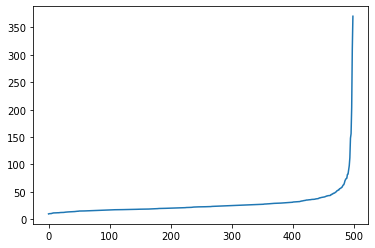

In [26]:
#Choosing the optimal epsilon
k = 10
# importing NearestNeighbors class 
from sklearn.neighbors import NearestNeighbors
# initialize model
neigh10 = NearestNeighbors(n_neighbors=10, n_jobs=-1)
# train for getting nearest neighbour
neigh10.fit(Xc1)
dist10, ind10 = neigh10.kneighbors(Xc1)
distances10 = [dist10[i][k-1] for i in range(len(dist10))]
distances10 = np.sort(distances10, axis=0)
plt.plot(distances10)

In [28]:
from sklearn.cluster import DBSCAN
eps=50
dbscan = DBSCAN(eps,min_samples=10).fit(Xc1)
dbscanlabels=dbscan.labels_
#print(dbscanlabels)
inst=Xc1.index
outd1=inst[np.where(dbscanlabels==-1)]
print(outd1)

Int64Index([75, 153, 182, 228, 247, 248, 258, 286, 342, 392, 486, 519, 645,
            710],
           dtype='int64')
